In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.shape

(1338, 7)

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df = df.rename(columns = {'region': 'location'})

In [10]:
df.head()

,age,sex,bmi,children,smoker,location,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [12]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
location    1338
charges     1338
dtype: int64

In [13]:
import seaborn as sns

In [14]:
numerical_columns = df.select_dtypes(include = ["int", "float"]).columns

In [15]:
list_numerical_columns = list(numerical_columns)
list_numerical_columns.pop(-1)
numerical_columns = list_numerical_columns

<Axes: >

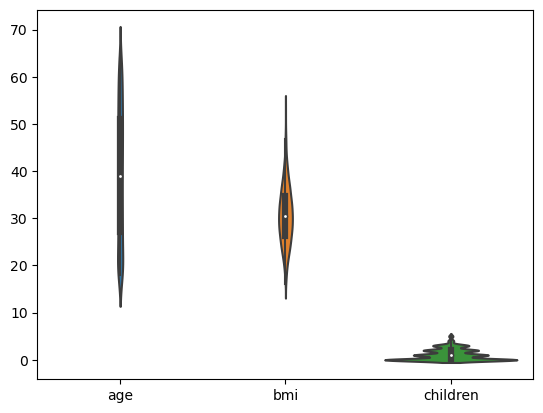

In [16]:
sns.violinplot(data=df[numerical_columns])

<Axes: >

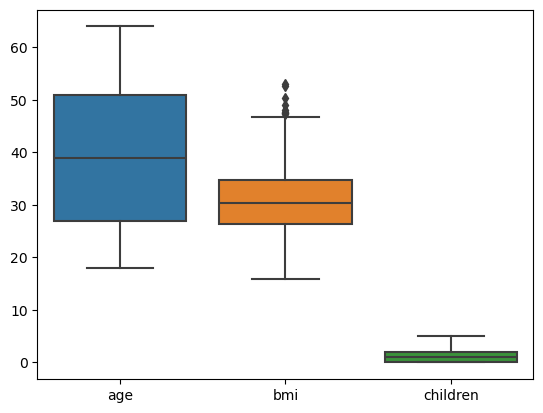

In [17]:
sns.boxplot(data=df[numerical_columns])

In [18]:
df.age.kurtosis()

-1.2450876526418673

In [19]:
df.age.skew()

0.05567251565299186

In [20]:
df["age"].kurtosis()

-1.2450876526418673

Step 1: Define null and alternative hypothesis

 H0:μ1<=μ2
The average charges of smokers are less than or equal to those of non-smokers

rs
 Ha:μ1>μ2
  The average charges of smokares is greater  those of than nonsmokers

In [21]:
null = "The average charges of smokers are less than or equal to those of non-smokers"
alternate = "The average charges of smokares is greater those of than nonsmokers"
alpha = 0.05


In [22]:
smoker = df.loc[df.smoker == 'yes']

In [23]:
non_smoker = df.loc[df.smoker=="no"]

In [24]:
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [25]:
df.head(10)

,age,sex,bmi,children,smoker,location,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
6,46,female,33.440,1,0,southeast,8240.58960
7,37,female,27.740,3,0,northwest,7281.50560
8,37,male,29.830,2,0,northeast,6406.41070
9,60,female,25.840,0,0,northwest,28923.13692


In [28]:
non_smoker

,age,sex,bmi,children,smoker,location,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [29]:
smoker

,age,sex,bmi,children,smoker,location,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [30]:
charges_no = non_smoker.charges

In [31]:
charges_yes = smoker.charges

In [32]:
charges_no.mean()

8434.268297856204

In [33]:
charges_yes.mean()

32050.23183153284

In [35]:
t_statistic, p_value = st.ttest_ind(charges_yes, charges_no)

In [ ]:
p_value_1 = p_value/2

In [40]:
print(f"{t_statistic}\n{p_value}")

46.66492117272371
8.271435842179102e-283


In [41]:
if p_value <= alpha:
    decision = "Reject null hypothesis."
    print(f"Decision: {decision}")
else:
    decision = "Fail to reject null hypothesis."
    print(f"Decision: {decision}")

Decision: Reject null hypothesis.


In conclusion, we reject the null hypothesis that the average charges of smokers are less than or equal to those of non-smokers.